In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
rev = pd.read_csv('review.csv')
lab = pd.read_csv('label.csv')
df = pd.read_csv('Tweets.csv')
rev

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,0.000000000000000000e+00.10,0.000000000000000000e+00.11,0.000000000000000000e+00.12,0.000000000000000000e+00.13,0.000000000000000000e+00.14,0.000000000000000000e+00.15,0.000000000000000000e+00.16,0.000000000000000000e+00.17,0.000000000000000000e+00.18,4.200000000000000000e+01
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,341.0,20.0,164.0,884.0,80.0,4441.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,193.0,18.0,84.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2577.0,2180.0,3170.0,676.0,1463.0,756.0,19.0,307.0,1926.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,30.0,154.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.0,67.0,1.0,26.0,2.0,4442.0,30.0,154.0,13.0,1366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,221.0,1.0,261.0
14567,0.0,0.0,0.0,0.0,0.0,0.0,45.0,49.0,35.0,1.0,1887.0,406.0,49.0,35.0,1.0,22.0,72.0,1334.0,10.0,687.0
14568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293.0,278.0,25.0
14569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,31.0,1.0,2.0,101.0,32.0,752.0,1667.0


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

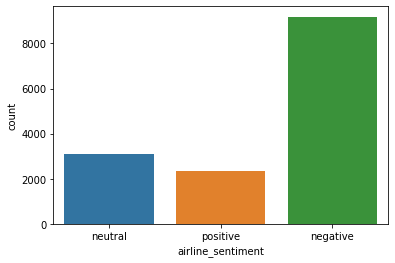

In [5]:
sns.countplot(x='airline_sentiment', data=df)

In [6]:
split_frac = 0.80
split_idx = int(len(rev)*split_frac)
train_x, remaining_x = rev[:split_idx], rev[split_idx:]
train_y, remaining_y = lab[:split_idx], lab[split_idx:]
test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(11656, 20) 
Validation set: 	(1457, 20) 
Test set: 		(1458, 20)


In [8]:
model_1 = Sequential()
model_1.add(Embedding(10262, 128,input_length=20))
model_1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 128)           1313536   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,445,249
Trainable params: 1,445,249
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_1.fit(train_x, train_y,
          batch_size=30,
          epochs=15,
          validation_data=(val_x, val_y))
score, acc = model_1.evaluate(test_x,test_y,batch_size=30)
print("Score : ",score)
print("Accuracy : ",acc)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp0vflq__r.py, line 13)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp0vflq__r.py, line 13)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpr_arkqiu.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

KeyboardInterrupt: 

In [20]:
model_2 = Sequential()
model_2.add(Embedding(10262, 128,input_length=20))
model_2.add(LSTM(128,return_sequences=True))
model_2.add(LSTM(128,return_sequences=False))
model_2.add(Dropout(0.5))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_2.add(Dense(1, activation='relu'))
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 128)           1313536   
_________________________________________________________________
lstm_9 (LSTM)                (None, 20, 128)           131584    
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 1,576,833
Trainable params: 1,576,833
Non-trainable params: 0
_________________________________________________________________


In [22]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
model_2.fit(train_x, train_y,
          batch_size=30,
          epochs=15,
          validation_data=(val_x, val_y)
      #    callbacks=[checkpoint], 
       #   verbose=False
         )
score, acc = model_2.evaluate(test_x,test_y,batch_size=30)
print("Score : ",score)
print("Accuracy : ",acc)

Train on 11656 samples, validate on 1457 samples
Epoch 1/15
11656/11656 [==============================] - 34s 3ms/step - loss: 0.6271 - accuracy: 0.7190 - val_loss: 0.5292 - val_accuracy: 0.7570
Epoch 2/15
11656/11656 [==============================] - 32s 3ms/step - loss: 0.4771 - accuracy: 0.8048 - val_loss: 0.6867 - val_accuracy: 0.7852
Epoch 3/15
11656/11656 [==============================] - 33s 3ms/step - loss: 0.3690 - accuracy: 0.8206 - val_loss: 0.8267 - val_accuracy: 0.7666
Epoch 4/15
11656/11656 [==============================] - 34s 3ms/step - loss: 0.3991 - accuracy: 0.7963 - val_loss: 0.8731 - val_accuracy: 0.7364
Epoch 5/15
11656/11656 [==============================] - 33s 3ms/step - loss: 0.3558 - accuracy: 0.8122 - val_loss: 1.0996 - val_accuracy: 0.7234
Epoch 6/15
11656/11656 [==============================] - 33s 3ms/step - loss: 0.2668 - accuracy: 0.7786 - val_loss: 1.0915 - val_accuracy: 0.7097
Epoch 7/15
11656/11656 [==============================] - 32s 3ms/ste